# 6.3 Efficient optimization with the SMO algorithm

### 6.3.2 Solving small datasets with the simplified SMO

In [11]:
import random

def loadDataSet(fileName):
    """
    Load dataset from a file.
    :param fileName: Path to the dataset file
    :return: Tuple of data matrix and label vector
    """
    dataMat = []
    labelMat = []
    with open(fileName) as fr:
        for line in fr.readlines():
            lineArr = line.strip().split('\t')
            dataMat.append([float(lineArr[0]), float(lineArr[1])])
            labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

def selectJrand(i, m):
    """
    Randomly select a j index that is not equal to i.
    :param i: Index to avoid
    :param m: Total number of indices
    :return: Randomly selected index
    """
    j = i
    while j == i:
        j = int(random.uniform(0, m))
    return j

def clipAlpha(aj, H, L):
    """
    Clip the value of alpha to be within the range [L, H].
    :param aj: Current value of alpha
    :param H: Upper bound
    :param L: Lower bound
    :return: Clipped value of alpha
    """
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

dataArr, labelArr = loadDataSet('testSet.txt')
print("Data Array:", dataArr)
print("Label Array:", labelArr)


Data Array: [[3.542485, 1.977398], [3.018896, 2.556416], [7.55151, -1.58003], [2.114999, -0.004466], [8.127113, 1.274372], [7.108772, -0.986906], [8.610639, 2.046708], [2.326297, 0.265213], [3.634009, 1.730537], [0.341367, -0.894998], [3.125951, 0.293251], [2.123252, -0.783563], [0.887835, -2.797792], [7.139979, -2.329896], [1.696414, -1.212496], [8.117032, 0.623493], [8.497162, -0.266649], [4.658191, 3.507396], [8.197181, 1.545132], [1.208047, 0.2131], [1.928486, -0.32187], [2.175808, -0.014527], [7.886608, 0.461755], [3.223038, -0.552392], [3.628502, 2.190585], [7.40786, -0.121961], [7.286357, 0.251077], [2.301095, -0.533988], [-0.232542, -0.54769], [3.457096, -0.082216], [3.023938, -0.057392], [8.015003, 0.885325], [8.991748, 0.923154], [7.916831, -1.781735], [7.616862, -0.217958], [2.450939, 0.744967], [7.270337, -2.507834], [1.749721, -0.961902], [1.803111, -0.176349], [8.804461, 3.044301], [1.231257, -0.568573], [2.074915, 1.41055], [-0.743036, -1.736103], [3.536555, 3.96496], [8

In [12]:
import numpy as np
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    """
    Simplified SMO algorithm for SVM.
    :param dataMatIn: Input data matrix
    :param classLabels: Class labels
    :param C: Regularization parameter
    :param toler: Tolerance for stopping criterion
    :param maxIter: Maximum number of iterations
    :return: Tuple of weights and bias
    """
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    b = 0
    m,n = np.shape(dataMatrix)
    alphas = np.mat(np.zeros((m, 1)))
    iter = 0
    
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            fXi = float(np.multiply(alphas, labelMat).T * (dataMatrix * dataMatrix[i, :].T)) + b
            Ei = fXi - float(labelMat[i])
            if ((labelMat[i] * Ei < -toler) and (alphas[i] < C)) or ((labelMat[i] * Ei > toler) and (alphas[i] > 0)):
                j = selectJrand(i, m)
                fXj = float(np.multiply(alphas, labelMat).T * (dataMatrix * dataMatrix[j, :].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy()
                alphaJold = alphas[j].copy()
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[i] + alphas[j] - C)
                    H = min(C, alphas[i] + alphas[j])
                if L == H:
                    print("L==H")
                    continue
                eta = 2.0 * dataMatrix[i, :] * dataMatrix[j, :].T - dataMatrix[i, :] * dataMatrix[i, :].T - dataMatrix[j, :] * dataMatrix[j, :].T
                if eta >= 0:
                    print("eta>=0")
                    continue
                alphas[j] -= labelMat[j] * (Ei - Ej) / eta
                alphas[j] = clipAlpha(alphas[j], H, L)
                if abs(alphas[j] - alphaJold) < 0.00001:
                    print("j not moving enough")
                    continue
                alphas[i] += labelMat[j] * labelMat[i] * (alphaJold - alphas[j])
                b1 = b - Ei - labelMat[i] * (alphas[i] - alphaIold) * dataMatrix[i, :] * dataMatrix[i, :].T - labelMat[j] * (alphas[j] - alphaJold) * dataMatrix[i, :] * dataMatrix[j, :].T
                b_2 = b - Ej - labelMat[i] * (alphas[i] - alphaIold) * dataMatrix[i, :] * dataMatrix[j, :].T - labelMat[j] * (alphas[j] - alphaJold) * dataMatrix[j, :] * dataMatrix[j, :].T
                if (0 < alphas[i]) and (C > alphas[i]):
                    b = b1
                elif (0 < alphas[j]) and (C > alphas[j]):
                    b = b_2
                else:
                    b = (b1 + b_2) / 2.0
                alphaPairsChanged += 1
                print("iter: %d i: %d, pairs changed %d" % (iter, i, alphaPairsChanged))
        if (alphaPairsChanged == 0):
            iter += 1
        else:
            iter = 0
        print("iteration number: %d" % iter)
    return b, alphas

b , alphas = smoSimple(dataArr, labelArr, 0.6, 0.001, 40)
print("b:", b)
print("alphas:", alphas[alphas > 0])

iter: 0 i: 0, pairs changed 1
L==H
iter: 0 i: 4, pairs changed 2
j not moving enough
L==H
L==H
iter: 0 i: 23, pairs changed 3
L==H
L==H
j not moving enough
j not moving enough
L==H
iter: 0 i: 54, pairs changed 4
iter: 0 i: 55, pairs changed 5
j not moving enough
L==H
iter: 0 i: 96, pairs changed 6
L==H
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
iter: 1 i: 44, pairs changed 1
L==H
L==H
j not moving enough
iter: 1 i: 50, pairs changed 2
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
j no

# 6.4 Speeding up optimization with the full Platt SMO

L==H
全样本遍历:第0次迭代 样本:0, alpha优化次数:0
L==H
全样本遍历:第0次迭代 样本:1, alpha优化次数:0
全样本遍历:第0次迭代 样本:2, alpha优化次数:1
L==H
全样本遍历:第0次迭代 样本:3, alpha优化次数:1
全样本遍历:第0次迭代 样本:4, alpha优化次数:2
全样本遍历:第0次迭代 样本:5, alpha优化次数:2
全样本遍历:第0次迭代 样本:6, alpha优化次数:2
alpha_j变化太小
全样本遍历:第0次迭代 样本:7, alpha优化次数:2
L==H
全样本遍历:第0次迭代 样本:8, alpha优化次数:2
全样本遍历:第0次迭代 样本:9, alpha优化次数:2
L==H
全样本遍历:第0次迭代 样本:10, alpha优化次数:2
L==H
全样本遍历:第0次迭代 样本:11, alpha优化次数:2
L==H
全样本遍历:第0次迭代 样本:12, alpha优化次数:2
全样本遍历:第0次迭代 样本:13, alpha优化次数:2
L==H
全样本遍历:第0次迭代 样本:14, alpha优化次数:2
全样本遍历:第0次迭代 样本:15, alpha优化次数:2
全样本遍历:第0次迭代 样本:16, alpha优化次数:2
L==H
全样本遍历:第0次迭代 样本:17, alpha优化次数:2
全样本遍历:第0次迭代 样本:18, alpha优化次数:3
全样本遍历:第0次迭代 样本:19, alpha优化次数:3
全样本遍历:第0次迭代 样本:20, alpha优化次数:3
全样本遍历:第0次迭代 样本:21, alpha优化次数:3
alpha_j变化太小
全样本遍历:第0次迭代 样本:22, alpha优化次数:3
L==H
全样本遍历:第0次迭代 样本:23, alpha优化次数:3
L==H
全样本遍历:第0次迭代 样本:24, alpha优化次数:3
全样本遍历:第0次迭代 样本:25, alpha优化次数:4
alpha_j变化太小
全样本遍历:第0次迭代 样本:26, alpha优化次数:4
全样本遍历:第0次迭代 样本:27, alpha优化次数:4
全样本遍历:第0次迭代 样本:28, alpha优化次数:4
L==H
全样本遍历:第0次迭代 样本:

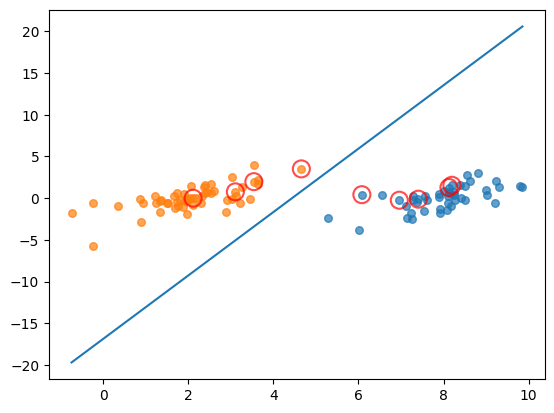

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import random

"""
   Parameters：
       dataMatIn - 数据矩阵
       classLabels - 数据标签
       C - 松弛变量
       toler - 容错率
   """
# 数据结构，维护所有需要操作的值（书上说是用于清理代码的数据结构）
class optStruct:
    def __init__(self, dataMatIn, classLabels, C, toler):
        self.X = dataMatIn#数据矩阵
        self.labelMat = classLabels#数据标签
        self.C = C#松弛变量
        self.tol = toler#容错率
        self.m = np.shape(dataMatIn)[0]#数据矩阵行数
        self.alphas = np.mat(np.zeros((self.m,1)))#根据矩阵行数初始化alpha参数为0   
        self.b = 0#初始化b参数为0
        #根据矩阵行数初始化虎误差缓存，第一列为是否有效的标志位，第二列为实际的误差E的值。
        self.eCache = np.mat(np.zeros((self.m,2)))


"""
Parameters:
    fileName - 文件名
Returns:
    dataMat - 数据矩阵
    labelMat - 数据标签
"""
# 读取数据
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():#逐行读取，滤除空格等
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])#添加数据
        labelMat.append(float(lineArr[2]))#添加标签
    return dataMat,labelMat

"""
Parameters：
    oS - 数据结构
    k - 标号为k的数据
Returns:
    Ek - 标号为k的数据误差
"""
# 计算误差
def calcEk(oS, k):
    fXk = float(np.multiply(oS.alphas,oS.labelMat).T*(oS.X*oS.X[k,:].T) + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek

"""
Parameters:
    i - alpha_i的索引值
    m - alpha参数个数
Returns:
    j - alpha_j的索引值
"""
# 函数说明:随机选择alpha_j的索引值
def selectJrand(i, m):
    j = i#选择一个不等于i的j
    while (j == i):
        j = int(random.uniform(0, m))
    return j

"""
Parameters：
    i - 标号为i的数据的索引值
    oS - 数据结构
    Ei - 标号为i的数据误差
Returns:
    j, maxK - 标号为j或maxK的数据的索引值
    Ej - 标号为j的数据误差
"""
# 内循环启发方式2
def selectJ(i, oS, Ei):
    maxK = -1; maxDeltaE = 0; Ej = 0#初始化
    oS.eCache[i] = [1,Ei]#根据Ei更新误差缓存
    validEcacheList = np.nonzero(oS.eCache[:,0].A)[0]#返回误差不为0的数据的索引值
    if (len(validEcacheList)) > 1:#有不为0的误差
        for k in validEcacheList:#遍历,找到最大的Ek
            if k == i: continue#不计算i,浪费时间
            Ek = calcEk(oS, k)#计算Ek
            deltaE = abs(Ei - Ek)#计算|Ei-Ek|
            if (deltaE > maxDeltaE):#找到maxDeltaE
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej#返回maxK,Ej
    else:#没有不为0的误差
        j = selectJrand(i, oS.m)#随机选择alpha_j的索引值
        Ej = calcEk(oS, j)#计算Ej
    return j, Ej#j,Ej

"""
Parameters：
    oS - 数据结构
    k - 标号为k的数据的索引值
Returns:
    无
"""
# 计算Ek,并更新误差缓存
def updateEk(oS, k):
    Ek = calcEk(oS, k)#计算Ek
    oS.eCache[k] = [1,Ek]#更新误差缓存

"""
Parameters:
    aj - alpha_j的值
    H - alpha上限
    L - alpha下限
Returns:
    aj - 修剪后的alpah_j的值
"""
# 修剪alpha_j
def clipAlpha(aj,H,L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

"""
Parameters：
    i - 标号为i的数据的索引值
    oS - 数据结构
Returns:
    1 - 有任意一对alpha值发生变化
    0 - 没有任意一对alpha值发生变化或变化太小
"""
# 优化的SMO算法
def innerL(i, oS):
    #步骤1：计算误差Ei
    Ei = calcEk(oS, i)
    #优化alpha,设定一定的容错率。
    if ((oS.labelMat[i] * Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or\
     ((oS.labelMat[i] * Ei > oS.tol) and (oS.alphas[i] > 0)):
        #使用内循环启发方式2选择alpha_j,并计算Ej
        j,Ej = selectJ(i, oS, Ei)
        #保存更新前的aplpha值，使用深拷贝
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        #步骤2：计算上下界L和H
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L == H:
            print("L==H")
            return 0
        #步骤3：计算eta
        eta = 2.0 * oS.X[i,:] * oS.X[j,:].T - oS.X[i,:] * oS.X[i,:].T - oS.X[j,:] * oS.X[j,:].T
        if eta >= 0:
            print("eta>=0")
            return 0
        #步骤4：更新alpha_j
        oS.alphas[j] -= oS.labelMat[j] * (Ei - Ej)/eta
        #步骤5：修剪alpha_j
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        #更新Ej至误差缓存
        updateEk(oS, j)
        if (abs(oS.alphas[j] - alphaJold) < 0.00001):
            print("alpha_j变化太小")
            return 0
        #步骤6：更新alpha_i
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])
        #更新Ei至误差缓存
        updateEk(oS, i)
        #步骤7：更新b_1和b_2
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.X[i,:]*oS.X[i,:].T - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.X[i,:]*oS.X[j,:].T
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.X[i,:]*oS.X[j,:].T - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.X[j,:]*oS.X[j,:].T
        #步骤8：根据b_1和b_2更新b
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else:
        return 0

"""
Parameters：
    dataMatIn - 数据矩阵
    classLabels - 数据标签
    C - 松弛变量
    toler - 容错率
    maxIter - 最大迭代次数
Returns:
    oS.b - SMO算法计算的b
    oS.alphas - SMO算法计算的alphas
"""
# 完整的线性SMO算法
def smoP(dataMatIn, classLabels, C, toler, maxIter):
    oS = optStruct(np.mat(dataMatIn), np.mat(classLabels).transpose(), C, toler)#初始化数据结构
    iter = 0#初始化当前迭代次数
    entireSet = True; alphaPairsChanged = 0
    #遍历整个数据集都alpha也没有更新或者超过最大迭代次数,则退出循环
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:#遍历整个数据集                           
            for i in range(oS.m):       
                alphaPairsChanged += innerL(i,oS)#使用优化的SMO算法
                print("全样本遍历:第%d次迭代 样本:%d, alpha优化次数:%d" % (iter,i,alphaPairsChanged))
            iter += 1
        else:#遍历非边界值
            nonBoundIs = np.nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]#遍历不在边界0和C的alpha
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                print("非边界遍历:第%d次迭代 样本:%d, alpha优化次数:%d" % (iter,i,alphaPairsChanged))
            iter += 1
        if entireSet:#遍历一次后改为非边界遍历
            entireSet = False
        elif (alphaPairsChanged == 0):#如果alpha没有更新,计算全样本遍历
            entireSet = True 
        print("迭代次数: %d" % iter)
    return oS.b,oS.alphas#返回SMO算法计算的b和alphas

"""
Parameters:
    dataMat - 数据矩阵
    w - 直线法向量
    b - 直线解决
Returns:
    无
"""
# 分类结果可视化
def showClassifer(dataMat, classLabels, w, b):
    #绘制样本点
    data_plus = []#正样本
    data_minus = []#负样本
    for i in range(len(dataMat)):
        if classLabels[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)#转换为numpy矩阵
    data_minus_np = np.array(data_minus)#转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1], s=30, alpha=0.7)#正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1], s=30, alpha=0.7)#负样本散点图
    #绘制直线
    x1 = max(dataMat)[0]
    x2 = min(dataMat)[0]
    a1, a2 = w
    b = float(b)
    a1 = float(a1[0])
    a2 = float(a2[0])
    y1, y2 = (-b- a1*x1)/a2, (-b - a1*x2)/a2
    plt.plot([x1, x2], [y1, y2])
    #找出支持向量点
    for i, alpha in enumerate(alphas):
        if abs(alpha) > 0:
            x, y = dataMat[i]
            plt.scatter([x], [y], s=150, c='none', alpha=0.7, linewidth=1.5, edgecolor='red')
    plt.show()

"""
Parameters:
    dataArr - 数据矩阵
    classLabels - 数据标签
    alphas - alphas值
Returns:
    w - 计算得到的w
"""
# 计算w
def calcWs(alphas,dataArr,classLabels):
    X = np.mat(dataArr); labelMat = np.mat(classLabels).transpose()
    m,n = np.shape(X)
    w = np.zeros((n,1))
    for i in range(m):
        w += np.multiply(alphas[i]*labelMat[i],X[i,:].T)
    return w


if __name__ == '__main__':
    dataArr, classLabels = loadDataSet('testSet.txt')
    b, alphas = smoP(dataArr, classLabels, 0.6, 0.001, 40)
    w = calcWs(alphas,dataArr, classLabels)
    showClassifer(dataArr, classLabels, w, b)


# 6.5 Using kernels for more complex data

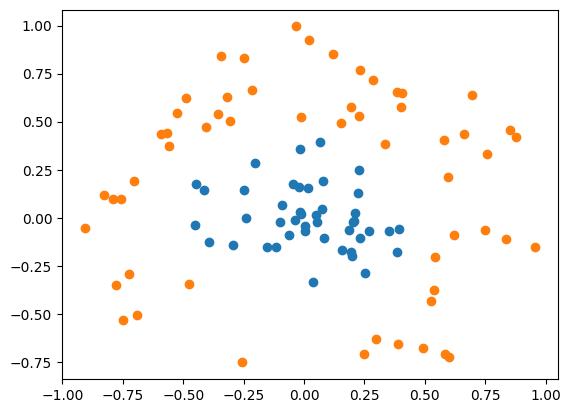

In [16]:
# -*-coding:utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np

"""
Parameters:
    fileName - 文件名
Returns:
    dataMat - 数据矩阵
    labelMat - 数据标签
"""
# 读取数据
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():#逐行读取，滤除空格等
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])#添加数据
        labelMat.append(float(lineArr[2]))#添加标签
    return dataMat,labelMat

"""
数据可视化
Parameters:
    dataMat - 数据矩阵
    labelMat - 数据标签
Returns:
    无
"""
def showDataSet(dataMat, labelMat):
    data_plus = []#正样本
    data_minus = []#负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)#转换为numpy矩阵
    data_minus_np = np.array(data_minus)#转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1])#正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1])#负样本散点图
    plt.show()

if __name__ == '__main__':
    dataArr,labelArr = loadDataSet('testSetRBF.txt')#加载训练集
    showDataSet(dataArr, labelArr)


In [17]:
# -*-coding:utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import random

"""
Parameters：
    dataMatIn - 数据矩阵
    classLabels - 数据标签
    C - 松弛变量
    toler - 容错率
    kTup - 包含核函数信息的元组,第一个参数存放核函数类别，第二个参数存放必要的核函数需要用到的参数
"""
# 数据结构，维护所有需要操作的值
class optStruct:
    def __init__(self, dataMatIn, classLabels, C, toler, kTup):
        self.X = dataMatIn#数据矩阵
        self.labelMat = classLabels#数据标签
        self.C = C#松弛变量
        self.tol = toler#容错率
        self.m = np.shape(dataMatIn)[0]#数据矩阵行数
        self.alphas = np.mat(np.zeros((self.m,1)))#根据矩阵行数初始化alpha参数为0   
        self.b = 0#初始化b参数为0
        #根据矩阵行数初始化虎误差缓存，第一列为是否有效的标志位，第二列为实际的误差E的值。
        self.eCache = np.mat(np.zeros((self.m,2)))
        self.K = np.mat(np.zeros((self.m,self.m)))#初始化核K
        for i in range(self.m):#计算所有数据的核K
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)

"""
Parameters：
    X - 数据矩阵
    A - 单个数据的向量
    kTup - 包含核函数信息的元组
Returns:
    K - 计算的核K
"""
# 通过核函数将数据转换更高维的空间
def kernelTrans(X, A, kTup):
    m,n = np.shape(X)
    K = np.mat(np.zeros((m,1)))
    if kTup[0] == 'lin': K = X * A.T#线性核函数,只进行内积。
    elif kTup[0] == 'rbf':#高斯核函数,根据高斯核函数公式进行计算
        for j in range(m):
            deltaRow = X[j,:] - A
            K[j] = deltaRow*deltaRow.T
        K = np.exp(K/(-1*kTup[1]**2))#计算高斯核K
    else: raise NameError('核函数无法识别')
    return K#返回计算的核K

"""
Parameters:
    fileName - 文件名
Returns:
    dataMat - 数据矩阵
    labelMat - 数据标签
"""
# 读取数据
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():#逐行读取，滤除空格等
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])#添加数据
        labelMat.append(float(lineArr[2]))#添加标签
    return dataMat,labelMat

"""
Parameters：
    oS - 数据结构
    k - 标号为k的数据
Returns:
    Ek - 标号为k的数据误差
"""
# 计算误差
def calcEk(oS, k):
    fXk = float(np.multiply(oS.alphas,oS.labelMat).T*oS.K[:,k] + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek

"""
Parameters:
    i - alpha_i的索引值
    m - alpha参数个数
Returns:
    j - alpha_j的索引值
"""
# 函数说明:随机选择alpha_j的索引值
def selectJrand(i, m):
    j = i#选择一个不等于i的j
    while (j == i):
        j = int(random.uniform(0, m))
    return j

"""
Parameters：
    i - 标号为i的数据的索引值
    oS - 数据结构
    Ei - 标号为i的数据误差
Returns:
    j, maxK - 标号为j或maxK的数据的索引值
    Ej - 标号为j的数据误差
"""
# 内循环启发方式2
def selectJ(i, oS, Ei):
    maxK = -1; maxDeltaE = 0; Ej = 0#初始化
    oS.eCache[i] = [1,Ei]#根据Ei更新误差缓存
    validEcacheList = np.nonzero(oS.eCache[:,0].A)[0]#返回误差不为0的数据的索引值
    if (len(validEcacheList)) > 1:#有不为0的误差
        for k in validEcacheList:#遍历,找到最大的Ek
            if k == i: continue#不计算i,浪费时间
            Ek = calcEk(oS, k)#计算Ek
            deltaE = abs(Ei - Ek)#计算|Ei-Ek|
            if (deltaE > maxDeltaE):#找到maxDeltaE
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej#返回maxK,Ej
    else:#没有不为0的误差
        j = selectJrand(i, oS.m)#随机选择alpha_j的索引值
        Ej = calcEk(oS, j)#计算Ej
    return j, Ej#j,Ej

"""
Parameters：
    oS - 数据结构
    k - 标号为k的数据的索引值
Returns:
    无
"""
# 计算Ek,并更新误差缓存
def updateEk(oS, k):
    Ek = calcEk(oS, k)#计算Ek
    oS.eCache[k] = [1,Ek]#更新误差缓存

"""
Parameters:
    aj - alpha_j的值
    H - alpha上限
    L - alpha下限
Returns:
    aj - 修剪后的alpah_j的值
"""
# 修剪alpha_j
def clipAlpha(aj,H,L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

"""
Parameters：
    i - 标号为i的数据的索引值
    oS - 数据结构
Returns:
    1 - 有任意一对alpha值发生变化
    0 - 没有任意一对alpha值发生变化或变化太小
"""
# 优化的SMO算法
def innerL(i, oS):
    #步骤1：计算误差Ei
    Ei = calcEk(oS, i)
    #优化alpha,设定一定的容错率。
    if ((oS.labelMat[i] * Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or\
     ((oS.labelMat[i] * Ei > oS.tol) and (oS.alphas[i] > 0)):
        #使用内循环启发方式2选择alpha_j,并计算Ej
        j,Ej = selectJ(i, oS, Ei)
        #保存更新前的aplpha值，使用深拷贝
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        #步骤2：计算上下界L和H
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L == H:
            print("L==H")
            return 0
        #步骤3：计算eta
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j]
        if eta >= 0:
            print("eta>=0")
            return 0
        #步骤4：更新alpha_j
        oS.alphas[j] -= oS.labelMat[j] * (Ei - Ej)/eta
        #步骤5：修剪alpha_j
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        #更新Ej至误差缓存
        updateEk(oS, j)
        if (abs(oS.alphas[j] - alphaJold) < 0.00001):
            print("alpha_j变化太小")
            return 0
        #步骤6：更新alpha_i
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])
        #更新Ei至误差缓存
        updateEk(oS, i)
        #步骤7：更新b_1和b_2
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,i] - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[i,j]
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,j]- oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[j,j]
        #步骤8：根据b_1和b_2更新b
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else:
        return 0

"""
Parameters：
    dataMatIn - 数据矩阵
    classLabels - 数据标签
    C - 松弛变量
    toler - 容错率
    maxIter - 最大迭代次数
    kTup - 包含核函数信息的元组
Returns:
    oS.b - SMO算法计算的b
    oS.alphas - SMO算法计算的alphas
"""
# 完整的线性SMO算法
def smoP(dataMatIn, classLabels, C, toler, maxIter, kTup = ('lin',0)):
    oS = optStruct(np.mat(dataMatIn), np.mat(classLabels).transpose(), C, toler, kTup)#初始化数据结构
    iter = 0#初始化当前迭代次数
    entireSet = True; alphaPairsChanged = 0
    #遍历整个数据集都alpha也没有更新或者超过最大迭代次数,则退出循环
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:#遍历整个数据集                           
            for i in range(oS.m):       
                alphaPairsChanged += innerL(i,oS)#使用优化的SMO算法
                print("全样本遍历:第%d次迭代 样本:%d, alpha优化次数:%d" % (iter,i,alphaPairsChanged))
            iter += 1
        else:#遍历非边界值
            nonBoundIs = np.nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]#遍历不在边界0和C的alpha
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                print("非边界遍历:第%d次迭代 样本:%d, alpha优化次数:%d" % (iter,i,alphaPairsChanged))
            iter += 1
        if entireSet:#遍历一次后改为非边界遍历
            entireSet = False
        elif (alphaPairsChanged == 0):#如果alpha没有更新,计算全样本遍历
            entireSet = True 
        print("迭代次数: %d" % iter)
    return oS.b,oS.alphas#返回SMO算法计算的b和alphas

"""
Parameters:
    k1 - 使用高斯核函数的时候表示到达率
Returns:
    无
"""
# 测试函数
def testRbf(k1 = 0.3):
    dataArr,labelArr = loadDataSet('testSetRBF.txt')#加载训练集
    b,alphas = smoP(dataArr, labelArr, 200, 0.0001, 100, ('rbf', k1))#根据训练集计算b和alphas
    datMat = np.mat(dataArr); labelMat = np.mat(labelArr).transpose()
    svInd = np.nonzero(alphas.A > 0)[0]#获得支持向量
    sVs = datMat[svInd]
    labelSV = labelMat[svInd];
    print("支持向量个数:%d" % np.shape(sVs)[0])
    m,n = np.shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],('rbf', k1))#计算各个点的核
        predict = kernelEval.T * np.multiply(labelSV,alphas[svInd]) + b#根据支持向量的点，计算超平面，返回预测结果
        #返回数组中各元素的正负符号，用1和-1表示，并统计错误个数
        if np.sign(predict) != np.sign(labelArr[i]): errorCount += 1
    print("训练集错误率: %.2f%%" % ((float(errorCount)/m)*100))#打印错误率
    dataArr,labelArr = loadDataSet('testSetRBF2.txt')#加载测试集
    errorCount = 0
    datMat = np.mat(dataArr); labelMat = np.mat(labelArr).transpose()
    m,n = np.shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],('rbf', k1))#计算各个点的核
        predict=kernelEval.T * np.multiply(labelSV,alphas[svInd]) + b#根据支持向量的点，计算超平面，返回预测结果
        #返回数组中各元素的正负符号，用1和-1表示，并统计错误个数
        if np.sign(predict) != np.sign(labelArr[i]): errorCount += 1
    print("测试集错误率: %.2f%%" % ((float(errorCount)/m)*100))#打印错误率


if __name__ == '__main__':
    testRbf()


全样本遍历:第0次迭代 样本:0, alpha优化次数:1
全样本遍历:第0次迭代 样本:1, alpha优化次数:2
全样本遍历:第0次迭代 样本:2, alpha优化次数:3
全样本遍历:第0次迭代 样本:3, alpha优化次数:4
全样本遍历:第0次迭代 样本:4, alpha优化次数:5
全样本遍历:第0次迭代 样本:5, alpha优化次数:6
全样本遍历:第0次迭代 样本:6, alpha优化次数:7
全样本遍历:第0次迭代 样本:7, alpha优化次数:8
全样本遍历:第0次迭代 样本:8, alpha优化次数:8
全样本遍历:第0次迭代 样本:9, alpha优化次数:9
全样本遍历:第0次迭代 样本:10, alpha优化次数:10
全样本遍历:第0次迭代 样本:11, alpha优化次数:10
全样本遍历:第0次迭代 样本:12, alpha优化次数:10
全样本遍历:第0次迭代 样本:13, alpha优化次数:11
全样本遍历:第0次迭代 样本:14, alpha优化次数:12
全样本遍历:第0次迭代 样本:15, alpha优化次数:13
全样本遍历:第0次迭代 样本:16, alpha优化次数:14
全样本遍历:第0次迭代 样本:17, alpha优化次数:15
全样本遍历:第0次迭代 样本:18, alpha优化次数:16
全样本遍历:第0次迭代 样本:19, alpha优化次数:16
全样本遍历:第0次迭代 样本:20, alpha优化次数:17
全样本遍历:第0次迭代 样本:21, alpha优化次数:18
alpha_j变化太小
全样本遍历:第0次迭代 样本:22, alpha优化次数:18
全样本遍历:第0次迭代 样本:23, alpha优化次数:19
全样本遍历:第0次迭代 样本:24, alpha优化次数:20
全样本遍历:第0次迭代 样本:25, alpha优化次数:20
全样本遍历:第0次迭代 样本:26, alpha优化次数:20
全样本遍历:第0次迭代 样本:27, alpha优化次数:21
alpha_j变化太小
全样本遍历:第0次迭代 样本:28, alpha优化次数:21
L==H
全样本遍历:第0次迭代 样本:29, alpha优化次数:21
全样本遍历:第0次迭代 样本:30, alpha优化次数:22

In [20]:
# -*- coding: UTF-8 -*-
import numpy as np
import operator
from os import listdir
from sklearn.svm import SVC

"""
Parameters:
    filename - 文件名
Returns:
    returnVect - 返回的二进制图像的1x1024向量
"""
# 将32x32的二进制图像转换为1x1024向量
def img2vector(filename):
    #创建1x1024零向量
    returnVect = np.zeros((1, 1024))
    #打开文件
    fr = open(filename)
    #按行读取
    for i in range(32):
        #读一行数据
        lineStr = fr.readline()
        #每一行的前32个元素依次添加到returnVect中
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    #返回转换后的1x1024向量
    return returnVect

# 手写数字分类测试
def handwritingClassTest():
    #测试集的Labels
    hwLabels = []
    #返回trainingDigits目录下的文件名
    trainingFileList = listdir('./digits/trainingDigits')
    #返回文件夹下文件的个数
    m = len(trainingFileList)
    #初始化训练的Mat矩阵,测试集
    trainingMat = np.zeros((m, 1024))
    #从文件名中解析出训练集的类别
    for i in range(m):
        #获得文件的名字
        fileNameStr = trainingFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #将获得的类别添加到hwLabels中
        hwLabels.append(classNumber)
        #将每一个文件的1x1024数据存储到trainingMat矩阵中
        trainingMat[i,:] = img2vector('./digits/trainingDigits/%s' % (fileNameStr))
    clf = SVC(C=200,kernel='rbf')
    clf.fit(trainingMat,hwLabels)
    #返回testDigits目录下的文件列表
    testFileList = listdir('./digits/testDigits')
    #错误检测计数
    errorCount = 0.0
    #测试数据的数量
    mTest = len(testFileList)
    #从文件中解析出测试集的类别并进行分类测试
    for i in range(mTest):
        #获得文件的名字
        fileNameStr = testFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #获得测试集的1x1024向量,用于训练
        vectorUnderTest = img2vector('./digits/testDigits/%s' % (fileNameStr))
        #获得预测结果
        # classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        classifierResult = clf.predict(vectorUnderTest)
        print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber))
        if(classifierResult != classNumber):
            errorCount += 1.0
    print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))


if __name__ == '__main__':
    handwritingClassTest()


分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1